In [1]:
import pandas as pd
from imblearn.under_sampling import RandomUnderSampler

In [2]:
df_hits = pd.read_csv('ga_hits.csv', dtype={'event_label': 'object'})
df_session = pd.read_csv('ga_sessions.csv', dtype={'client_id': 'object', 'device_model': 'object'})


In [3]:
df_hits.info()
df_hits.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15726470 entries, 0 to 15726469
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   session_id      object 
 1   hit_date        object 
 2   hit_time        float64
 3   hit_number      int64  
 4   hit_type        object 
 5   hit_referer     object 
 6   hit_page_path   object 
 7   event_category  object 
 8   event_action    object 
 9   event_label     object 
 10  event_value     float64
dtypes: float64(2), int64(1), object(8)
memory usage: 1.3+ GB


,session_id,hit_date,hit_time,hit_number,hit_type,hit_referer,hit_page_path,event_category,event_action,event_label,event_value
0,5639623078712724064.1640254056.1640254056,2021-12-23,597864.0,30,event,NaN,sberauto.com/cars?utm_source_initial=google&ut...,quiz,quiz_show,NaN,NaN
1,7750352294969115059.1640271109.1640271109,2021-12-23,597331.0,41,event,NaN,sberauto.com/cars/fiat?city=1&city=18&rental_c...,quiz,quiz_show,NaN,NaN
2,885342191847998240.1640235807.1640235807,2021-12-23,796252.0,49,event,NaN,sberauto.com/cars/all/volkswagen/polo/e994838f...,quiz,quiz_show,NaN,NaN
3,142526202120934167.1640211014.1640211014,2021-12-23,934292.0,46,event,NaN,sberauto.com/cars?utm_source_initial=yandex&ut...,quiz,quiz_show,NaN,NaN
4,3450086108837475701.1640265078.1640265078,2021-12-23,768741.0,79,event,NaN,sberauto.com/cars/all/mercedes-benz/cla-klasse...,quiz,quiz_show,NaN,NaN


In [4]:
df_session.info()
df_session.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1860042 entries, 0 to 1860041
Data columns (total 18 columns):
 #   Column                    Dtype 
---  ------                    ----- 
 0   session_id                object
 1   client_id                 object
 2   visit_date                object
 3   visit_time                object
 4   visit_number              int64 
 5   utm_source                object
 6   utm_medium                object
 7   utm_campaign              object
 8   utm_adcontent             object
 9   utm_keyword               object
 10  device_category           object
 11  device_os                 object
 12  device_brand              object
 13  device_model              object
 14  device_screen_resolution  object
 15  device_browser            object
 16  geo_country               object
 17  geo_city                  object
dtypes: int64(1), object(17)
memory usage: 255.4+ MB


,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_model,device_screen_resolution,device_browser,geo_country,geo_city
0,9055434745589932991.1637753792.1637753792,2108382700.1637753791,2021-11-24,14:36:32,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,NaN,360x720,Chrome,Russia,Zlatoust
1,905544597018549464.1636867290.1636867290,210838531.1636867288,2021-11-14,08:21:30,1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,IGUCNvHlhfHpROGclCit,mobile,Android,Samsung,NaN,385x854,Samsung Internet,Russia,Moscow
2,9055446045651783499.1640648526.1640648526,2108385331.1640648523,2021-12-28,02:42:06,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,NaN,360x720,Chrome,Russia,Krasnoyarsk
3,9055447046360770272.1622255328.1622255328,2108385564.1622255328,2021-05-29,05:00:00,1,kjsLglQLzykiRbcDiGcD,cpc,NaN,NOBKLgtuvqYWkXQHeYWM,NaN,mobile,NaN,Xiaomi,NaN,393x786,Chrome,Russia,Moscow
4,9055447046360770272.1622255345.1622255345,2108385564.1622255328,2021-05-29,05:00:00,2,kjsLglQLzykiRbcDiGcD,cpc,NaN,NaN,NaN,mobile,NaN,Xiaomi,NaN,393x786,Chrome,Russia,Moscow


In [5]:
#определим целевую переменную

In [6]:
#Целевое действие — события типа «Оставить заявку» и «Заказать звонок»
# (ga_hits.event_action in ['sub_car_claim_click', 'sub_car_claim_submit_click',
# 'sub_open_dialog_click', 'sub_custom_question_submit_click',
# 'sub_call_number_click', 'sub_callback_submit_click', 'sub_submit_success',
# 'sub_car_request_submit_click']).

In [9]:
df_hits['event_action'].nunique()


230

In [10]:
print(df_hits.columns)
print(df_session.columns)


Index(['session_id', 'hit_date', 'hit_time', 'hit_number', 'hit_type',
       'hit_referer', 'hit_page_path', 'event_category', 'event_action',
       'event_label', 'event_value'],
      dtype='object')
Index(['session_id', 'client_id', 'visit_date', 'visit_time', 'visit_number',
       'utm_source', 'utm_medium', 'utm_campaign', 'utm_adcontent',
       'utm_keyword', 'device_category', 'device_os', 'device_brand',
       'device_model', 'device_screen_resolution', 'device_browser',
       'geo_country', 'geo_city'],
      dtype='object')


# Подготовка данных

### Удаляем дубликаты

In [11]:
print(df_hits['session_id'].duplicated().sum())
print(df_session['session_id'].duplicated().sum())


13991860
0


In [12]:
df_hits = df_hits.drop_duplicates()
print(df_hits['session_id'].duplicated().sum())


13991860


In [13]:
# Сначала вычислим количество пропущенных значений в каждой строке
df_hits['missing_values_count'] = df_hits.isnull().sum(axis=1)
# Затем отсортируем по session_id и количеству пропущенных значений, чтобы с минимальным количеством пропусков шли первыми
df_hits_sorted = df_hits.sort_values(by=['session_id', 'missing_values_count'])
# Удалим дубликаты по session_id, оставив первую строку (с минимальным количеством пропусков)
df_hits_cleaned = df_hits_sorted.drop_duplicates(subset='session_id', keep='first')


In [14]:
print(df_hits_cleaned['session_id'].duplicated().sum())


0


In [15]:
#Количество уникальных значений
unique_hits_session = df_hits_cleaned['session_id'].nunique()
# Количество пропущенных значений
missing_hits_session = df_hits_cleaned['session_id'].isna().sum()
print(f"Уникальных session_id в df_hits: {unique_hits_session}")
print(f"Пропущенных session_id в df_hits: {missing_hits_session}")


# Количество уникальных значений
unique_sessions_session = df_session['session_id'].nunique()
# Количество пропущенных значений
missing_sessions_session = df_session['session_id'].isna().sum()
print(f"Уникальных session_id в df_sessions: {unique_sessions_session}")
print(f"Пропущенных session_id в df_sessions: {missing_sessions_session}")


Уникальных session_id в df_hits: 1734610
Пропущенных session_id в df_hits: 0
Уникальных session_id в df_sessions: 1860042
Пропущенных session_id в df_sessions: 0


In [16]:
# Количество session_id из df_hits, которых нет в df_sessions
hits_not_in_session = df_hits_cleaned[~df_hits_cleaned['session_id'].isin(df_session['session_id'])]['session_id'].nunique()
# Количество session_id из df_sessions, которых нет в df_hits
sessions_not_in_hits_cleaned = df_session[~df_session['session_id'].isin(df_hits_cleaned['session_id'])]['session_id'].nunique()
print(f"session_id из df_hits, которых нет в df_sessions: {hits_not_in_session}")
print(f"session_id из df_sessions, которых нет в df_hits: {sessions_not_in_hits_cleaned}")


session_id из df_hits, которых нет в df_sessions: 2344
session_id из df_sessions, которых нет в df_hits: 127776


In [17]:
df_merged = pd.merge(df_hits_cleaned, df_session, on='session_id', how='inner')


In [18]:
df_merged.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1732266 entries, 0 to 1732265
Data columns (total 29 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   session_id                object 
 1   hit_date                  object 
 2   hit_time                  float64
 3   hit_number                int64  
 4   hit_type                  object 
 5   hit_referer               object 
 6   hit_page_path             object 
 7   event_category            object 
 8   event_action              object 
 9   event_label               object 
 10  event_value               float64
 11  missing_values_count      int64  
 12  client_id                 object 
 13  visit_date                object 
 14  visit_time                object 
 15  visit_number              int64  
 16  utm_source                object 
 17  utm_medium                object 
 18  utm_campaign              object 
 19  utm_adcontent             object 
 20  utm_keyword             

In [19]:
print(df_merged['session_id'].nunique())
print(df_merged['session_id'].duplicated().sum())


1732266
0


### Заполнение пропусков

In [20]:
def handle_critical_missing_data(df, threshold_col=90, threshold_row=1):
    """
    Обрабатывает пропущенные значения в датафрейме.
    Дропает колонки с пропусками больше threshold_col%,
    и строки с пропусками больше threshold_row%.

    :param df: Датафрейм для обработки.
    :param threshold_col: Порог для дропания колонок (по умолчанию 90%).
    :param threshold_row: Порог для дропания строк (по умолчанию 1%).
    :return: Обработанный датафрейм.
    """
    missing_percent_columns = df.isnull().mean() * 100
    columns_to_drop = missing_percent_columns[missing_percent_columns > threshold_col].index
    df.drop(columns=columns_to_drop, inplace=True)  
    

    rows_to_drop = missing_percent_columns[missing_percent_columns < threshold_row].index
    df.dropna(subset=rows_to_drop, inplace=True)
    return df
    

In [21]:
df_merged = handle_critical_missing_data(df_merged, 90, 1)
missing_percent = df_merged.isnull().mean() * 100
dtypes = df_merged.dtypes
missing_info = pd.DataFrame({"missing_percent": missing_percent, "dtype": dtypes})
missing_info = missing_info.sort_values(by="missing_percent", ascending=False)
print(missing_info)


                          missing_percent    dtype
hit_time                        59.156732  float64
utm_keyword                     58.928409   object
device_os                       58.536535   object
hit_referer                     36.662895   object
device_brand                    20.040989   object
utm_adcontent                   17.555869   object
event_label                     17.347751   object
utm_campaign                    11.273994   object
hit_date                         0.000000   object
hit_type                         0.000000   object
session_id                       0.000000   object
missing_values_count             0.000000    int64
event_action                     0.000000   object
event_category                   0.000000   object
hit_page_path                    0.000000   object
hit_number                       0.000000    int64
visit_number                     0.000000    int64
client_id                        0.000000   object
visit_date                     

In [22]:
unique_device_brands = df_merged['device_brand'].unique()
print(unique_device_brands)
device_brand_counts = df_merged['device_brand'].value_counts()
print(device_brand_counts)


['Samsung' 'Realme' 'Apple' 'Huawei' 'Xiaomi' nan 'Vivo' 'OPPO'
 '(not set)' 'OnePlus' 'Sony' 'BQ' 'ZTE' 'Asus' 'Umidigi' 'Meizu' 'itel'
 'LG' 'LeEco' 'Nokia' 'Blackview' 'Google' 'Lenovo' 'BlackBerry' 'Tecno'
 'Cubot' 'Alcatel' 'Neffos' 'Vsmart' 'Motorola' 'Infinix' 'TCL' 'Vertex'
 'Philips' 'Oukitel' 'Vernee' 'Micromax' 'HOMTOM' 'CAT' 'Prestigio'
 'Ulefone' 'Mozilla' 'DOOGEE' 'Leagoo' 'TP-Link' 'SonyEricsson' 'HTC'
 'Karbonn' 'Sharp' 'Wileyfox' 'POCO' 'A1' 'Gionee' 'Coolpad'
 'General Mobile' 'Digma' 'Yota Devices' 'Gome' 'Haier' 'Egreat' 'Kata'
 'Mito' 'Poptel' 'Flylion' 'AGM' 'SenseIT' 'DEXP' 'Archos' 'Teclast' 'Fly'
 'MLS' 'Keecoo' 'InFocus' 'Highscreen' 'Panasonic' 'Inoi' 'InnJoo' 'Iris'
 'LeTV' 'Itoos' 'MTC' 'Black Fox' 'Acer' 'Nuu' 'Celkon' 'Chuwi' 'Walton'
 'Xiaolajiao' 'Hisense' 'Lava' 'myPhone' 'Condor' 'ZOJI' 'Tele2' 'Razer'
 'Fujitsu' 'Alldocube' 'UGOOS' 'China Phone' 'Amazon' 'Nomu' 'PPTV'
 'Jiake' 'Guophone' 'Pantech' 'NOA' 'Caterpillar' 'Symphony' 'Wiko'
 'Wigor' 'Oyste

In [23]:
unique_device_brands = df_merged['device_os'].unique()
print(unique_device_brands)
device_brand_counts = df_merged['device_os'].value_counts()
print(device_brand_counts)

[nan 'Android' 'iOS' 'Macintosh' 'Windows' 'Linux' 'Chrome OS' '(not set)'
 'BlackBerry' 'Tizen' 'Firefox OS' 'Nokia' 'Samsung' 'Windows Phone']
device_os
Android          425499
iOS              182590
Windows           81731
Macintosh         23376
Linux              4616
(not set)           309
Chrome OS            65
BlackBerry           24
Tizen                 7
Firefox OS            3
Nokia                 2
Samsung               2
Windows Phone         2
Name: count, dtype: int64


In [24]:
df_merged.device_brand = df_merged.device_brand.fillna('other')
device_os_filled = df_merged.groupby(['device_brand'])['device_os'].agg(lambda x: x.mode()[0] if not x.mode().empty else 'Unknown')
df_merged['device_os'] = df_merged.apply(lambda row: device_os_filled.get(row['device_brand'], 'Unknown') if pd.isna(row['device_os']) else row['device_os'], axis=1)


In [25]:
print(df_merged['device_os'].isnull().sum())
print(df_merged['device_brand'].isnull().sum())
print((df_merged['device_os'] == 'Unknown').sum())

0
0
73


In [26]:
df_merged['utm_keyword'].nunique()

1192

In [27]:
df_merged.groupby(['utm_source', 'utm_medium'])['utm_keyword'].value_counts().head(20)


utm_source            utm_medium  utm_keyword         
AHgbtEjTEsiUMJouiDYS  referral    puhZPIYqKXeFPaUviSjo      14
ANoZJgYuPrWNkAAchryx  referral    puhZPIYqKXeFPaUviSjo       5
ArbfvYgWhqxkzywKqpQf  referral    puhZPIYqKXeFPaUviSjo      19
AuJjYKxJakEqFnCmyFtz  main_polka  puhZPIYqKXeFPaUviSjo       3
BAZCuyHZnaPrMGOMrcCQ  referral    puhZPIYqKXeFPaUviSjo       1
BHcvLfOaCWvWTykYqHVe  (not set)   puhZPIYqKXeFPaUviSjo       2
                      cpc         ZNhSIPchlbnKwZWcsKzz    5511
                                  JajANoFxoqXfKRNBUhzx    4510
                                  ITfrGJNwVsHBGJMAKoct    4081
                                  XEayFbemrPYbxFeNbxif    1680
                                  tVtbIKrPSOvrXLCznVVe    1512
                                  lVHkqXlZapieOXCrCJWG    1182
                                  psjAUzFZVWWCuxgCrtmQ     782
                                  nSReTmyFtbSjlPrTKoaX     681
                                  QYfbqJXuLdJGfOSFgZOs     662


In [28]:
df_merged['utm_keyword'] = df_merged.groupby(['utm_source', 'utm_medium'])['utm_keyword'].transform(lambda x: x.mode()[0] if not x.mode().empty else 'Unknown')



In [29]:
missing_percent = df_merged.isnull().mean() * 100
dtypes = df_merged.dtypes
missing_info = pd.DataFrame({"missing_percent": missing_percent, "dtype": dtypes})
missing_info = missing_info.sort_values(by="missing_percent", ascending=False)
print(missing_info)

unknown_percentage = (df_merged['utm_keyword'] == 'Unknown').mean() * 100
print(f"Процент значений 'Unknown': {unknown_percentage:.2f}%")

                          missing_percent    dtype
hit_time                        59.156732  float64
hit_referer                     36.662895   object
utm_adcontent                   17.555869   object
event_label                     17.347751   object
utm_campaign                    11.273994   object
hit_date                         0.000000   object
session_id                       0.000000   object
hit_page_path                    0.000000   object
event_category                   0.000000   object
hit_type                         0.000000   object
hit_number                       0.000000    int64
missing_values_count             0.000000    int64
event_action                     0.000000   object
client_id                        0.000000   object
visit_date                       0.000000   object
visit_number                     0.000000    int64
visit_time                       0.000000   object
utm_medium                       0.000000   object
utm_source                     

In [30]:
df_merged['hit_referer'] = df_merged.groupby('hit_type')['hit_referer'].transform(lambda x: x.mode()[0] if not x.mode().empty else 'Unknown')
df_merged['event_label'] = df_merged.groupby(['event_category', 'event_action'])['event_label'].transform(lambda x: x.mode()[0] if not x.mode().empty else 'Unknown')
df_merged['utm_campaign'] = df_merged.groupby(['utm_medium', 'utm_source', 'utm_keyword'])['utm_campaign'].transform(lambda x: x.mode()[0] if not x.mode().empty else 'Unknown')
df_merged['utm_adcontent'] = df_merged.groupby(['utm_campaign','utm_medium', 'utm_source', 'utm_keyword'])['utm_campaign'].transform(lambda x: x.mode()[0] if not x.mode().empty else 'Unknown')

In [31]:
missing_percent = df_merged.isnull().mean() * 100
dtypes = df_merged.dtypes
missing_info = pd.DataFrame({"missing_percent": missing_percent, "dtype": dtypes})
missing_info = missing_info.sort_values(by="missing_percent", ascending=False)
print(missing_info)

unknown_percentage = (df_merged['hit_referer'] == 'Unknown').mean() * 100
print(f"Процент значений 'Unknown': {unknown_percentage:.2f}%")

unknown_percentage = (df_merged['event_label'] == 'Unknown').mean() * 100
print(f"Процент значений 'Unknown': {unknown_percentage:.2f}%")

unknown_percentage = (df_merged['utm_campaign'] == 'Unknown').mean() * 100
print(f"Процент значений 'Unknown': {unknown_percentage:.2f}%")

unknown_percentage = (df_merged['utm_adcontent'] == 'Unknown').mean() * 100
print(f"Процент значений 'Unknown': {unknown_percentage:.2f}%")

                          missing_percent    dtype
hit_time                        59.156732  float64
session_id                       0.000000   object
hit_date                         0.000000   object
hit_number                       0.000000    int64
hit_type                         0.000000   object
hit_referer                      0.000000   object
hit_page_path                    0.000000   object
event_category                   0.000000   object
event_action                     0.000000   object
event_label                      0.000000   object
missing_values_count             0.000000    int64
client_id                        0.000000   object
visit_date                       0.000000   object
visit_time                       0.000000   object
visit_number                     0.000000    int64
utm_source                       0.000000   object
utm_medium                       0.000000   object
utm_campaign                     0.000000   object
utm_adcontent                  

In [32]:
for column in df_merged.columns:
    uknow_count = (df_merged[column] == 'Unknown').sum()
    uknow_percentage = (uknow_count / len(df_merged)) * 100
    print(f"В столбце '{column}' количество значений 'IKNOW': {uknow_count}, процент: {uknow_percentage:.2f}%")


В столбце 'session_id' количество значений 'IKNOW': 0, процент: 0.00%
В столбце 'hit_date' количество значений 'IKNOW': 0, процент: 0.00%
В столбце 'hit_time' количество значений 'IKNOW': 0, процент: 0.00%
В столбце 'hit_number' количество значений 'IKNOW': 0, процент: 0.00%
В столбце 'hit_type' количество значений 'IKNOW': 0, процент: 0.00%
В столбце 'hit_referer' количество значений 'IKNOW': 0, процент: 0.00%
В столбце 'hit_page_path' количество значений 'IKNOW': 0, процент: 0.00%
В столбце 'event_category' количество значений 'IKNOW': 0, процент: 0.00%
В столбце 'event_action' количество значений 'IKNOW': 0, процент: 0.00%
В столбце 'event_label' количество значений 'IKNOW': 8281, процент: 0.48%
В столбце 'missing_values_count' количество значений 'IKNOW': 0, процент: 0.00%
В столбце 'client_id' количество значений 'IKNOW': 0, процент: 0.00%
В столбце 'visit_date' количество значений 'IKNOW': 0, процент: 0.00%
В столбце 'visit_time' количество значений 'IKNOW': 0, процент: 0.00%
В с

In [33]:
df_merged = df_merged[~df_merged.isin(['Unknown']).any(axis=1)]


In [34]:
median_hit_time = df_merged['hit_time'].median()
df_merged.loc[:, 'hit_time'] = df_merged.loc[:, 'hit_time'].fillna(median_hit_time)



In [35]:
df_merged.head()

,session_id,hit_date,hit_time,hit_number,hit_type,hit_referer,hit_page_path,event_category,event_action,event_label,...,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_screen_resolution,device_browser,geo_country,geo_city
0,1000009318903347362.1632663668.1632663668,2021-09-26,10183.0,15,event,HbolMJUevblAbkHClEQa,podpiska.sberauto.com/faq?utm_source_initial=y...,sub_page_view,sub_faq,KclpemfoHstknWHFiLit,...,FTjNLDyTrXaWYgZymFkV,FTjNLDyTrXaWYgZymFkV,pHqgLcdBQPSLcrTpLkdr,mobile,Android,Samsung,412x869,Chrome,Russia,Gelendzhik
1,1000010177899156286.1635013443.1635013443,2021-10-23,166911.0,5,event,HbolMJUevblAbkHClEQa,podpiska.sberauto.com/,sub_button_click,sub_view_cars_click,OHfyUfDKdPgBdvelDlfG,...,LTuZkdKfxRGVceoWkVyg,LTuZkdKfxRGVceoWkVyg,puhZPIYqKXeFPaUviSjo,mobile,Android,Samsung,360x640,Samsung Internet,Russia,Voronezh
2,1000013386240115915.1635402956.1635402956,2021-10-28,163283.0,13,event,HbolMJUevblAbkHClEQa,podpiska.sberauto.com/,sub_button_click,sub_view_cars_click,OHfyUfDKdPgBdvelDlfG,...,LEoPHuyFvzoNfnzGgfcd,LEoPHuyFvzoNfnzGgfcd,puhZPIYqKXeFPaUviSjo,mobile,Android,Samsung,412x846,Chrome,Russia,Cherkessk
3,1000017303238376207.1623489300.1623489300,2021-06-12,10183.0,3,event,HbolMJUevblAbkHClEQa,podpiska.sberauto.com/,sub_page_view,sub_landing,KclpemfoHstknWHFiLit,...,LEoPHuyFvzoNfnzGgfcd,LEoPHuyFvzoNfnzGgfcd,puhZPIYqKXeFPaUviSjo,mobile,Android,Realme,360x780,Chrome,Russia,Irkutsk
4,1000020580299877109.1624943350.1624943350,2021-06-29,10183.0,3,event,HbolMJUevblAbkHClEQa,sberauto.com/cars/https://sberauto.com/cars/b8...,quiz,quiz_show,KclpemfoHstknWHFiLit,...,LTuZkdKfxRGVceoWkVyg,LTuZkdKfxRGVceoWkVyg,puhZPIYqKXeFPaUviSjo,mobile,iOS,Apple,414x736,Safari,Russia,Moscow


### Дальше

In [36]:
target_result = ['sub_car_claim_click', 'sub_car_claim_submit_click','sub_open_dialog_click',
                 'sub_custom_question_submit_click','sub_call_number_click', 'sub_callback_submit_click', 
                 'sub_submit_success','sub_car_request_submit_click'
                ]
df_merged['target'] = df_merged['event_action'].apply(lambda x: 1 if x in target_result else 0)

In [37]:
filtred_target_result =  df_merged[df_merged['event_action'].isin(target_result)]
pivot_table = filtred_target_result.pivot_table(
    index='event_action',
    columns='target',
    aggfunc='size',
    fill_value=0
)

print(pivot_table)

target                               1
event_action                          
sub_call_number_click              250
sub_callback_submit_click           71
sub_car_claim_click               2586
sub_car_claim_submit_click         142
sub_car_request_submit_click        66
sub_custom_question_submit_click    24
sub_open_dialog_click             4625
sub_submit_success                1796


In [38]:

# Вывести примеры строк с event_action из target_result
sample_events = df_merged[df_merged['event_action'].isin(target_result)].head(20)
print(sample_events[['event_action', 'target']])


                   event_action  target
120       sub_open_dialog_click       1
485       sub_open_dialog_click       1
583       sub_open_dialog_click       1
613       sub_open_dialog_click       1
642         sub_car_claim_click       1
809       sub_open_dialog_click       1
818          sub_submit_success       1
1293        sub_car_claim_click       1
1330        sub_car_claim_click       1
1359      sub_open_dialog_click       1
1396      sub_open_dialog_click       1
1399      sub_open_dialog_click       1
1652         sub_submit_success       1
1826      sub_open_dialog_click       1
1827      sub_open_dialog_click       1
2006  sub_callback_submit_click       1
2083      sub_open_dialog_click       1
2286      sub_open_dialog_click       1
2720        sub_car_claim_click       1
2817      sub_open_dialog_click       1


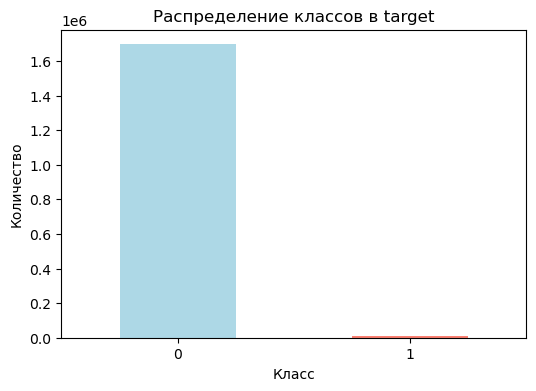

target
0    1696147
1       9560
Name: count, dtype: int64


In [39]:
import matplotlib.pyplot as plt

# Распределение классов в target
class_distribution = df_merged['target'].value_counts()

# Визуализация
plt.figure(figsize=(6, 4))
class_distribution.plot(kind='bar', color=['lightblue', 'salmon'])
plt.title('Распределение классов в target')
plt.xlabel('Класс')
plt.ylabel('Количество')
plt.xticks(rotation=0)
plt.show()

print(class_distribution)

In [43]:
columns_to_keep = [col for col in df_merged.columns if col.startswith(('utm_', 'device_', 'geo_'))]+ ['target']
df_clear = df_merged[columns_to_keep]
print(df_clear.shape)
print(df_clear.head())
df_clear.to_csv('data_disbalaced.csv', index=False)
print("DataFrame успешно сохранён в файл 'merged_data.csv' и готов к использованию.")

(1705707, 13)
             utm_source utm_medium          utm_campaign  \
0  MvfHsxITijuriZxsqZqt        cpm  FTjNLDyTrXaWYgZymFkV   
1  fDLlAcSmythWSCVMvqvL     (none)  LTuZkdKfxRGVceoWkVyg   
2  ZpYIoDJMcFzVoPFsHGJL     banner  LEoPHuyFvzoNfnzGgfcd   
3  ZpYIoDJMcFzVoPFsHGJL     banner  LEoPHuyFvzoNfnzGgfcd   
4  fDLlAcSmythWSCVMvqvL     (none)  LTuZkdKfxRGVceoWkVyg   

          utm_adcontent           utm_keyword device_category device_os  \
0  FTjNLDyTrXaWYgZymFkV  pHqgLcdBQPSLcrTpLkdr          mobile   Android   
1  LTuZkdKfxRGVceoWkVyg  puhZPIYqKXeFPaUviSjo          mobile   Android   
2  LEoPHuyFvzoNfnzGgfcd  puhZPIYqKXeFPaUviSjo          mobile   Android   
3  LEoPHuyFvzoNfnzGgfcd  puhZPIYqKXeFPaUviSjo          mobile   Android   
4  LTuZkdKfxRGVceoWkVyg  puhZPIYqKXeFPaUviSjo          mobile       iOS   

  device_brand device_screen_resolution    device_browser geo_country  \
0      Samsung                  412x869            Chrome      Russia   
1      Samsung              

In [44]:
df_clear.isna().sum()

utm_source                  0
utm_medium                  0
utm_campaign                0
utm_adcontent               0
utm_keyword                 0
device_category             0
device_os                   0
device_brand                0
device_screen_resolution    0
device_browser              0
geo_country                 0
geo_city                    0
target                      0
dtype: int64

Генерация данных для таргет (1) создаст много шума

In [45]:
# Разделяем признаки и целевую переменную
X = df_merged.drop('target', axis=1)
y = df_merged['target']
# Создаем балансировщик
rus = RandomUnderSampler(sampling_strategy='auto', random_state=42)
# Применяем балансировку
X_resampled, y_resampled = rus.fit_resample(X, y)
df_balanced = pd.concat([X_resampled, y_resampled], axis=1)

# Проверяем новый баланс классов
print(pd.Series(y_resampled).value_counts())

target
0    9560
1    9560
Name: count, dtype: int64


In [46]:
columns_to_keep = [col for col in df_balanced.columns if col.startswith(('utm_', 'device_', 'geo_'))]+ ['target']
df_formated = df_balanced[columns_to_keep]
print(df_formated.shape)
print(df_formated.head())

(19120, 13)
                   utm_source utm_medium          utm_campaign  \
696157   MvfHsxITijuriZxsqZqt        cpm  FTjNLDyTrXaWYgZymFkV   
1432901  bByPQxmDaMXgpHeypKSM   referral  LTuZkdKfxRGVceoWkVyg   
510894   ZpYIoDJMcFzVoPFsHGJL     banner  LEoPHuyFvzoNfnzGgfcd   
1057190  fDLlAcSmythWSCVMvqvL     (none)  LTuZkdKfxRGVceoWkVyg   
843233   kjsLglQLzykiRbcDiGcD        cpc  XHNUiSKKGTEpSAlaVMFQ   

                utm_adcontent           utm_keyword device_category device_os  \
696157   FTjNLDyTrXaWYgZymFkV  pHqgLcdBQPSLcrTpLkdr          mobile   Android   
1432901  LTuZkdKfxRGVceoWkVyg  puhZPIYqKXeFPaUviSjo          mobile   Android   
510894   LEoPHuyFvzoNfnzGgfcd  puhZPIYqKXeFPaUviSjo          mobile   Android   
1057190  LTuZkdKfxRGVceoWkVyg  puhZPIYqKXeFPaUviSjo          mobile   Android   
843233   XHNUiSKKGTEpSAlaVMFQ  hAmNSZmQkKQKAjZEGlgb          mobile   Android   

        device_brand device_screen_resolution    device_browser geo_country  \
696157       Samsung     

In [50]:
df_formated.isna().sum
none_mask = df_formated.apply(lambda x: x.astype(str).str.contains(r'\(none\)', case=False, na=False))
df_formated[none_mask.any(axis=1)]



,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_screen_resolution,device_browser,geo_country,geo_city,target
1057190,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,LTuZkdKfxRGVceoWkVyg,puhZPIYqKXeFPaUviSjo,mobile,Android,Xiaomi,393x818,Android Webview,Russia,Saint Petersburg,0
663258,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,LTuZkdKfxRGVceoWkVyg,puhZPIYqKXeFPaUviSjo,desktop,Windows,other,1536x864,Opera,Russia,Samara,0
697873,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,LTuZkdKfxRGVceoWkVyg,puhZPIYqKXeFPaUviSjo,mobile,iOS,Apple,428x926,Safari,Russia,Moscow,0
62391,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,LTuZkdKfxRGVceoWkVyg,puhZPIYqKXeFPaUviSjo,desktop,Windows,other,1920x1080,Opera,Ukraine,Kharkiv,0
448665,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,LTuZkdKfxRGVceoWkVyg,puhZPIYqKXeFPaUviSjo,mobile,iOS,Apple,414x896,Safari (in-app),Russia,Voronezh,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1722244,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,LTuZkdKfxRGVceoWkVyg,puhZPIYqKXeFPaUviSjo,desktop,Windows,other,1920x1080,Chrome,Russia,Moscow,1
1727410,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,LTuZkdKfxRGVceoWkVyg,puhZPIYqKXeFPaUviSjo,mobile,iOS,Apple,375x812,Chrome,Russia,Moscow,1
1729844,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,LTuZkdKfxRGVceoWkVyg,puhZPIYqKXeFPaUviSjo,mobile,iOS,Apple,414x896,Safari,Russia,Moscow,1
1731822,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,LTuZkdKfxRGVceoWkVyg,puhZPIYqKXeFPaUviSjo,desktop,Windows,other,1280x1024,Chrome,Russia,Nizhny Novgorod,1


In [55]:
df_drope_none = df_formated[df_formated['utm_medium'] != '(none)']


In [58]:
df_drope_none.to_csv('drope_none_data.csv', index=False)
print(df_drope_none.shape)
print("DataFrame успешно сохранён в файл 'drope_none_data.csv' и готов к использованию.")

(16299, 13)
DataFrame успешно сохранён в файл 'drope_none_data.csv' и готов к использованию.


In [59]:
print(df_drope_none['target'].value_counts())


target
1    8325
0    7974
Name: count, dtype: int64


In [61]:
# Разделяем признаки и целевую переменную
X = df_drope_none.drop('target', axis=1)
y = df_drope_none['target']
# Создаем балансировщик
rus = RandomUnderSampler(sampling_strategy='auto', random_state=42)
# Применяем балансировку
X_resampled, y_resampled = rus.fit_resample(X, y)
df_drope_none_balanced = pd.concat([X_resampled, y_resampled], axis=1)

# Проверяем новый баланс классов
print(pd.Series(y_resampled).value_counts())

target
0    7974
1    7974
Name: count, dtype: int64


In [62]:
df_drope_none_balanced.to_csv('data_drope_none_balanced.csv', index=False)
print("DataFrame успешно сохранён в файл 'data_drope_none_balanced.csv' и готов к использованию.")

DataFrame успешно сохранён в файл 'data_drope_none_balanced.csv' и готов к использованию.


In [66]:
df_formated.to_csv('data.csv', index=False)
print("DataFrame успешно сохранён в файл 'merged_data.csv' и готов к использованию.")

DataFrame успешно сохранён в файл 'merged_data.csv' и готов к использованию.
